<a href="https://colab.research.google.com/github/cbowler1234/ECGR4090_Tabkhi_Hw/blob/main/Hw3/Hw3_Prob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [692]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
torch.set_printoptions(edgeitems=2, linewidth=75)

In [693]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [694]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [695]:
def model(t_u, w1,w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [696]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [697]:
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w1,w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [698]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [699]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f"        z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
        z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [700]:
delta = 0.1

loss_rate_of_change_w1 = \
    (loss_fn(model(t_u, w1 + delta,w2, b), t_c) - 
     loss_fn(model(t_u, w1 - delta,w2, b), t_c)) / (2.0 * delta)
loss_rate_of_change_w2 = \
    (loss_fn(model(t_u, w1 ,w2+ delta, b), t_c) - 
     loss_fn(model(t_u, w1,w2 - delta, b), t_c)) / (2.0 * delta)

In [701]:
learning_rate = 1e-2

w1 = w1 - learning_rate * loss_rate_of_change_w1
w2 = w2 - learning_rate * loss_rate_of_change_w2

In [702]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w1,w2, b + delta), t_c) - 
     loss_fn(model(t_u, w1,w2, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [703]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [704]:
def dmodel_dw(t_u, w1,w2, b):
    return t_u

In [705]:
def dmodel_db(t_u, w1,w2, b):
    return 1.0

In [706]:
def grad_fn(t_u, t_c, t_p, w1,w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw(t_u, w1,w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw(t_u, w1,w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1,w2, b)
    return torch.stack([dloss_dw1.sum(),dloss_dw2.sum(), dloss_db.sum()])  # <1>

In [707]:
def training_loop(n_epochs,optimizer, learning_rate, params, t_u, t_c):
    
    loss_array=[]
    epoch_array=[]
    
    for epoch in range(1, n_epochs + 1):
        w1,w2, b = params
        
       

        t_p = model(t_u, w1,w2, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1,w2, b)  # <2>
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
          print('Epoch %d, Loss %f' % (epoch, float(loss)))
          loss_array.append(float(loss))
          epoch_array.append(epoch)
          
          

        
    print(loss_array)
    print(epoch_array)
    %matplotlib inline
    from matplotlib import pyplot as plt
        
    fig = plt.figure(dpi=250)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(epoch_array,loss_array) # <2>
        
    plt.savefig("temp_unknown_plot.png", format="png")  # bookskip
        
    return params

In [708]:
t_un = 0.01 * t_u

Epoch 500, Loss 26.266186
Epoch 1000, Loss 12.949670
Epoch 1500, Loss 6.968258
Epoch 2000, Loss 4.281574
Epoch 2500, Loss 3.074787
Epoch 3000, Loss 2.532740
Epoch 3500, Loss 2.289264
Epoch 4000, Loss 2.179901
Epoch 4500, Loss 2.130778
Epoch 5000, Loss 2.108713
[26.266185760498047, 12.94966983795166, 6.968258380889893, 4.28157377243042, 3.074786901473999, 2.5327401161193848, 2.2892637252807617, 2.179900884628296, 2.1307780742645264, 2.108712911605835]
[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]


tensor([ 24.3412,  27.9050, -10.3017], requires_grad=True)

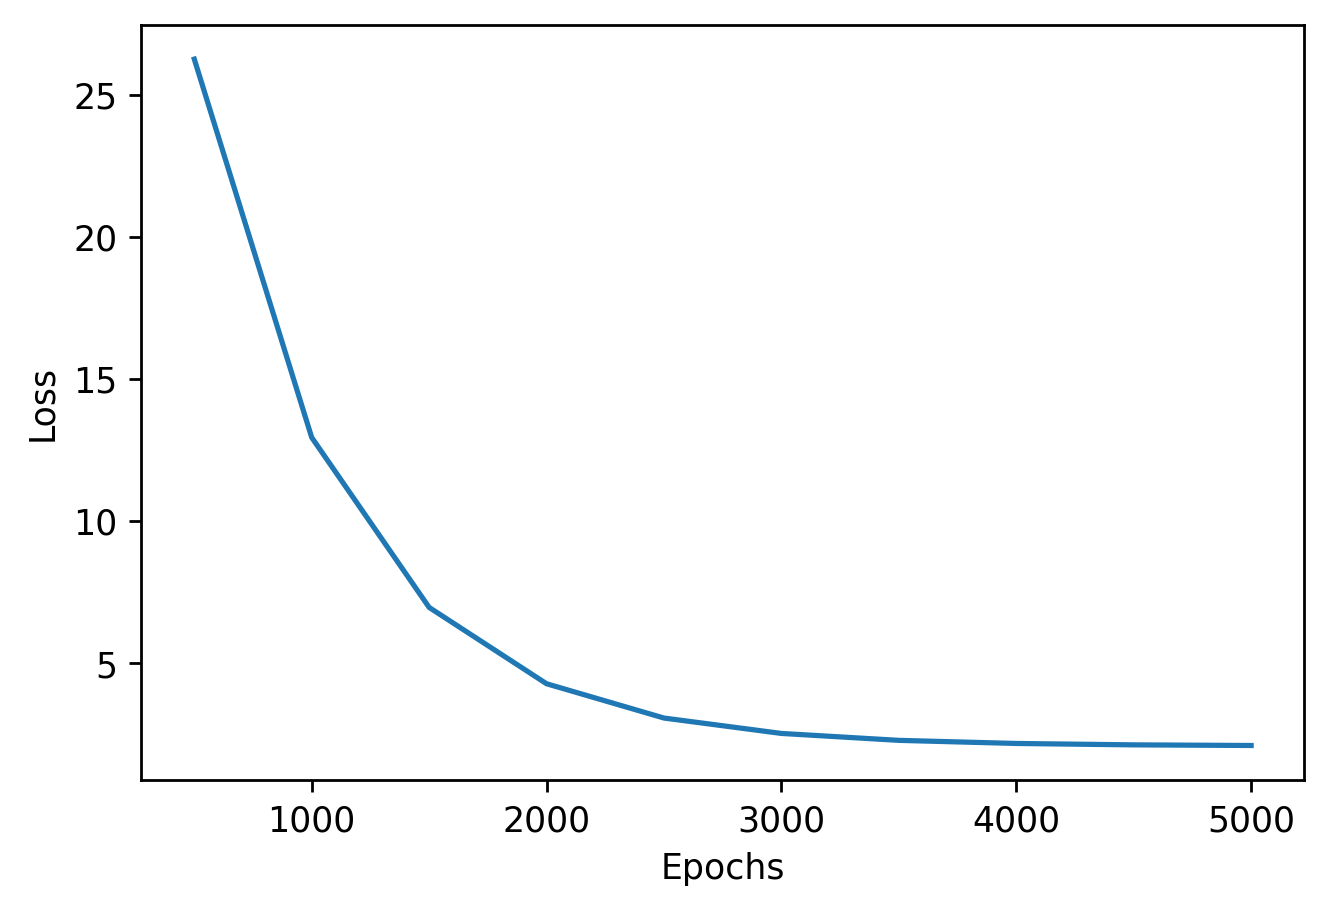

In [709]:
params = torch.tensor([1.0,1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer=optimizer,
    learning_rate = 1e-2, 
    params = params, 
    t_u = t_un, # <1>
    t_c = t_c)

In [710]:
point=np.linspace(.2,.8,100)
point=torch.tensor(point)

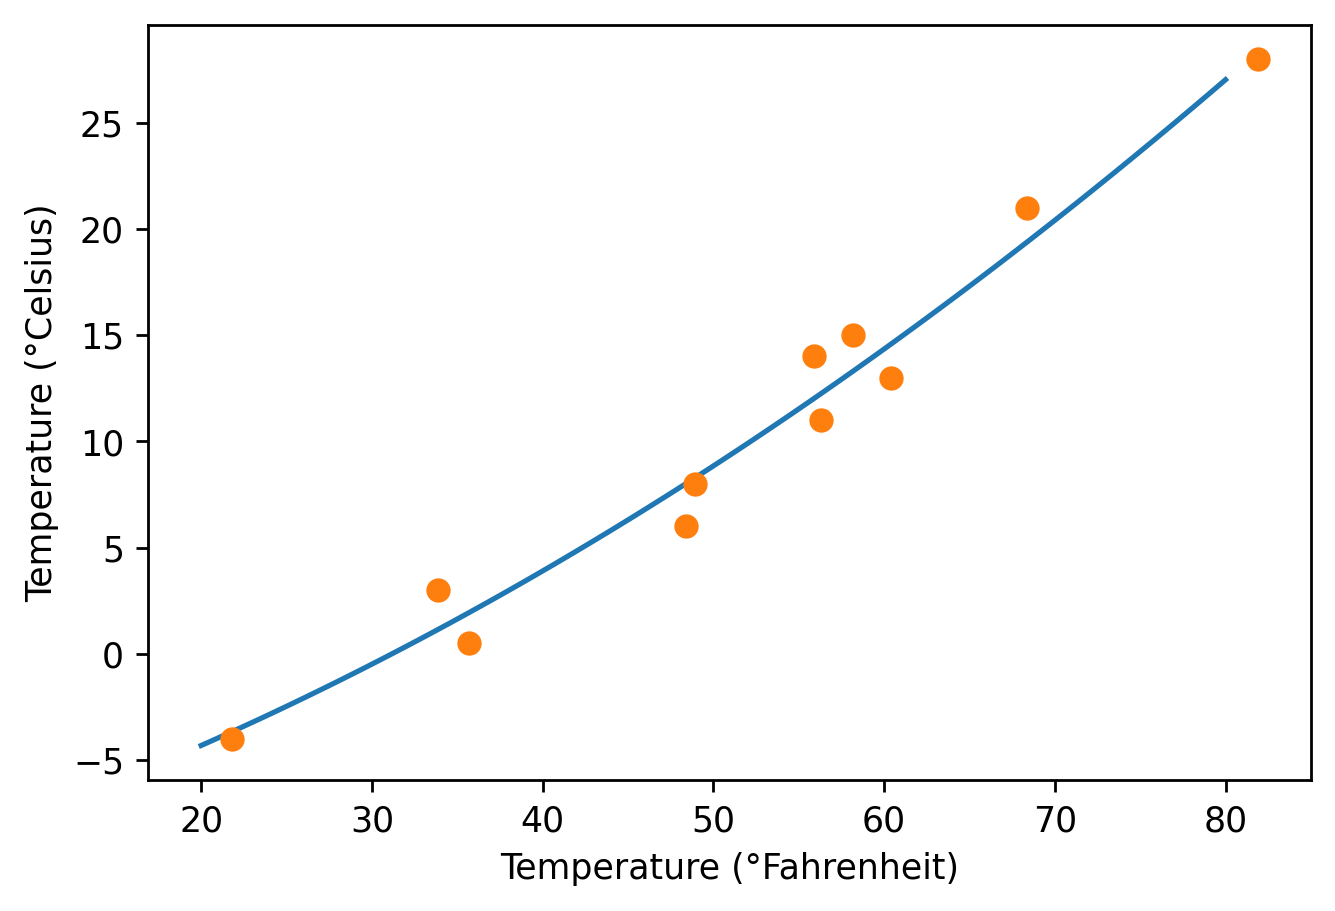

In [711]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(point, *params)  # <1>

fig = plt.figure(dpi=250)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(point.numpy()*100, t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

Epoch 500, Loss 57.949387
Epoch 1000, Loss 40.551369
Epoch 1500, Loss 33.974377
Epoch 2000, Loss 27.274971
Epoch 2500, Loss 20.752821
Epoch 3000, Loss 14.940603
Epoch 3500, Loss 10.199283
Epoch 4000, Loss 6.687762
Epoch 4500, Loss 4.367294
Epoch 5000, Loss 3.038020
[57.94938659667969, 40.551368713378906, 33.9743766784668, 27.27497100830078, 20.75282096862793, 14.940603256225586, 10.1992826461792, 6.687762260437012, 4.3672943115234375, 3.038020133972168]
[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]


tensor([19.8351, 27.2414, -7.6692], requires_grad=True)

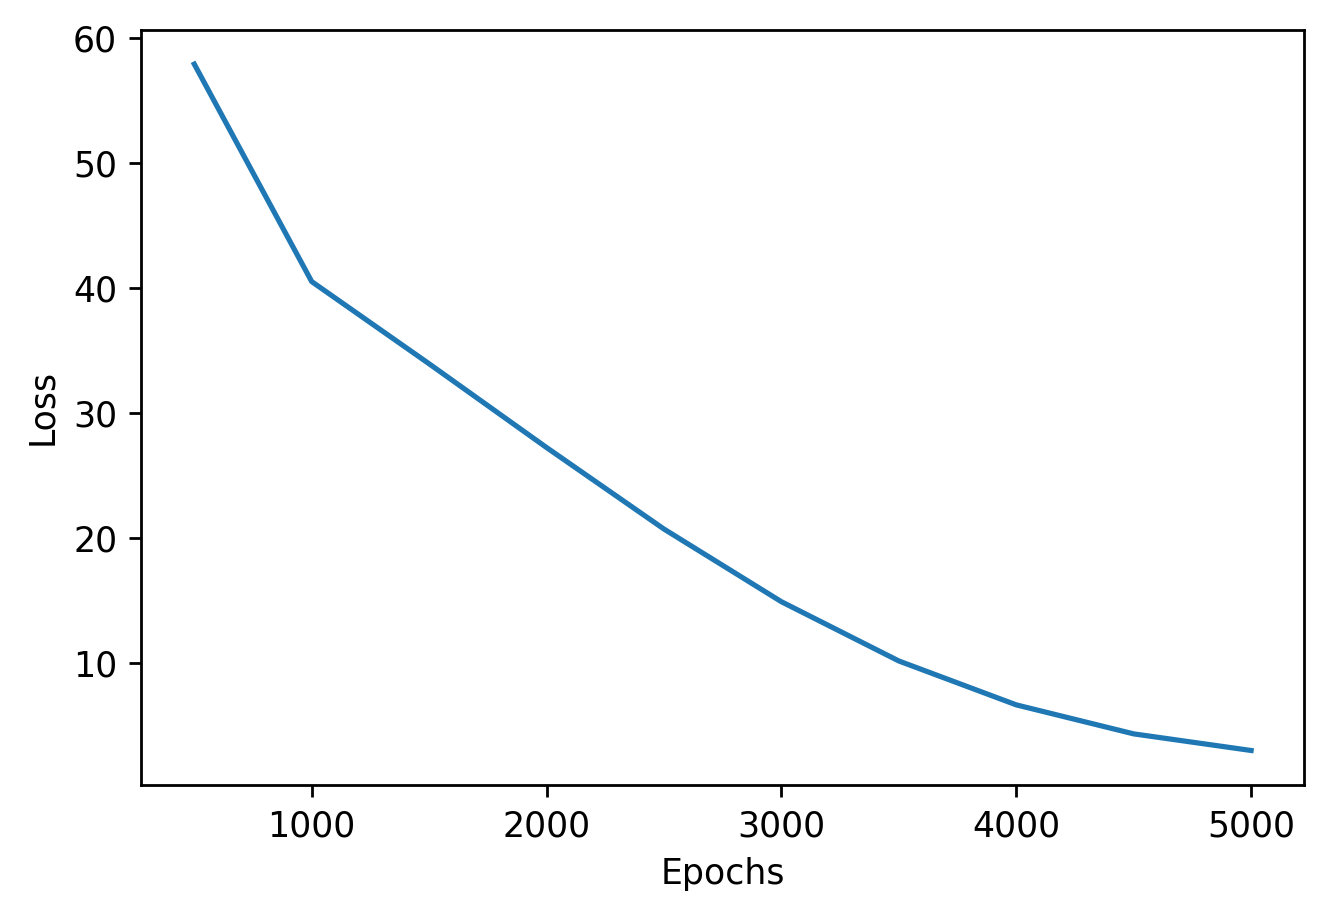

In [712]:
params = torch.tensor([1.0,1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer=optimizer,
    learning_rate = 1e-2, 
    params = params, 
    t_u = t_un, # <1>
    t_c = t_c)

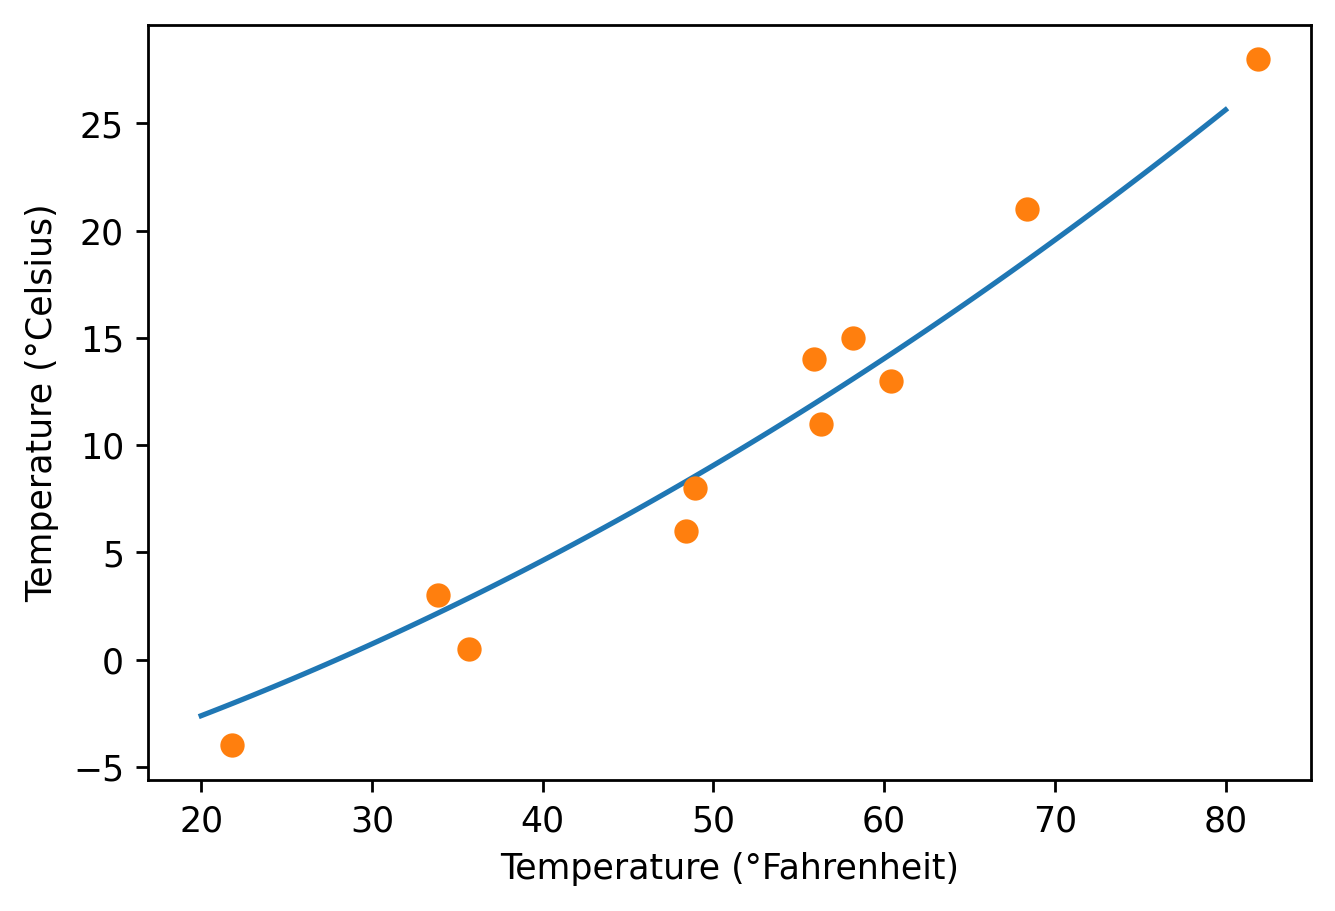

In [713]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(point, *params)  # <1>

fig = plt.figure(dpi=250)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(point.numpy()*100, t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

Epoch 500, Loss 148.762878
Epoch 1000, Loss 142.113174
Epoch 1500, Loss 137.210327
Epoch 2000, Loss 133.209290
Epoch 2500, Loss 129.783295
Epoch 3000, Loss 126.764717
Epoch 3500, Loss 124.054192
Epoch 4000, Loss 121.586945
Epoch 4500, Loss 119.318039
Epoch 5000, Loss 117.214790
[148.76287841796875, 142.11317443847656, 137.2103271484375, 133.20928955078125, 129.78329467773438, 126.76471710205078, 124.05419158935547, 121.58694458007812, 119.31803894042969, 117.21479034423828]
[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]


tensor([2.3441, 2.3510, 1.3315], requires_grad=True)

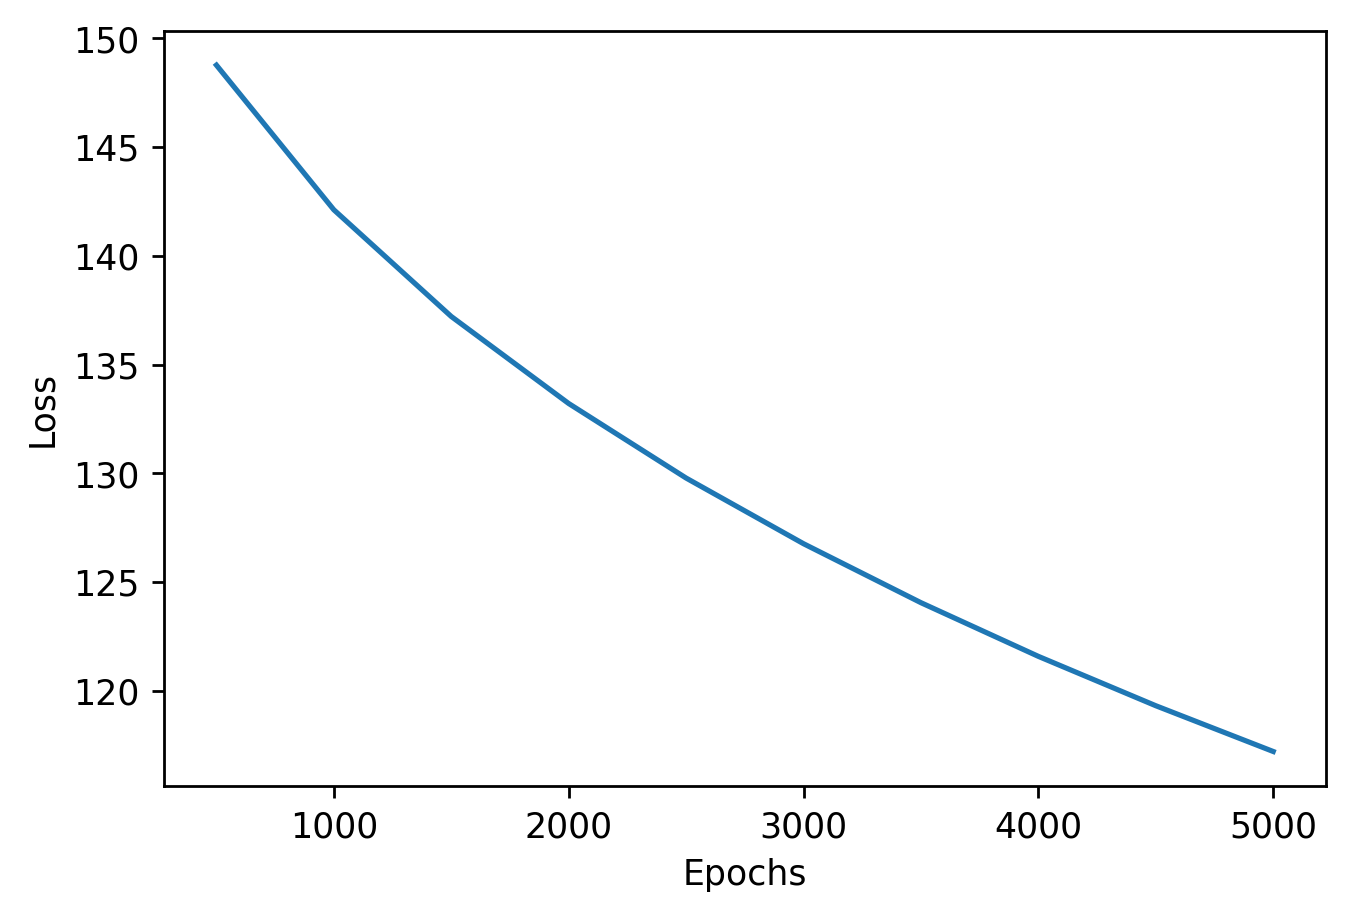

In [714]:
params = torch.tensor([1.0,1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adagrad([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer=optimizer,
    learning_rate = 1e-2,
    params = params, 
    t_u = t_un, # <1>
    t_c = t_c)

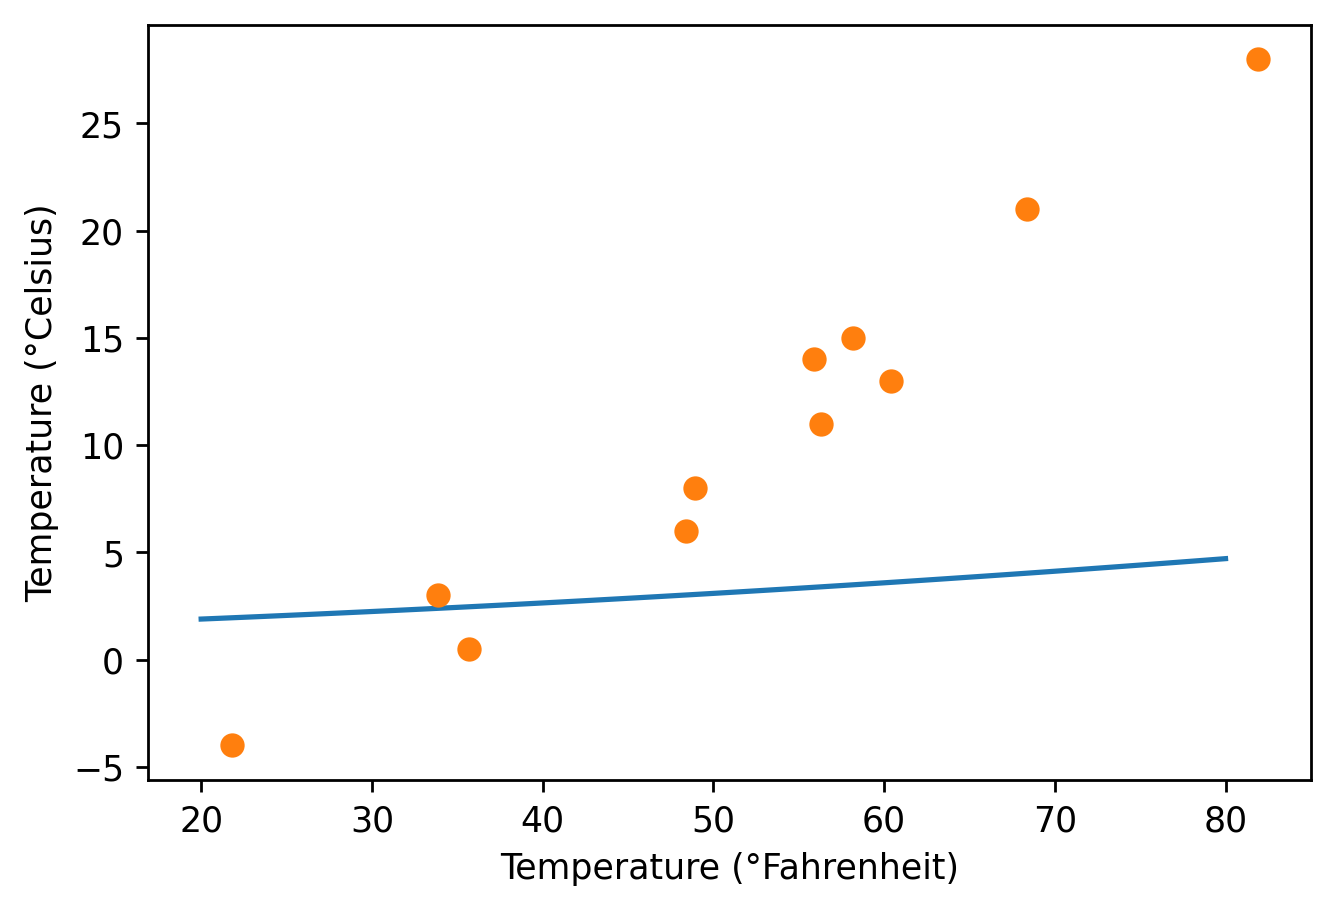

In [715]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(point, *params)  # <1>

fig = plt.figure(dpi=250)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(point.numpy()*100, t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [716]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices  # <1>

(tensor([ 5,  2,  7, 10,  9,  0,  8,  1,  3]), tensor([4, 6]))

In [717]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.01 * train_t_u
val_t_un = 0.01 * val_t_u

In [718]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    train_loss_array=[]
    val_loss_array=[]
    epoch_array=[]
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) # <1>
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = model(val_t_u, *params) # <1>
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() # <2>
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            train_loss_array.append(float(train_loss))
            val_loss_array.append(float(val_loss))

            epoch_array.append(epoch)
          
          

        
    print(train_loss_array)
    print(val_loss_array)
    %matplotlib inline
    from matplotlib import pyplot as plt
        
    fig = plt.figure(dpi=250)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(epoch_array,train_loss_array,label="Training Loss") # <2>
    plt.plot(epoch_array,val_loss_array,label="Validation Loss")
    plt.legend(loc="upper left")
                
    return params

Epoch 500, Training loss 27.8509, Validation loss 8.7351
Epoch 1000, Training loss 13.0502, Validation loss 2.3724
Epoch 1500, Training loss 6.6757, Validation loss 0.8137
Epoch 2000, Training loss 3.9302, Validation loss 0.9180
Epoch 2500, Training loss 2.7476, Validation loss 1.4723
Epoch 3000, Training loss 2.2382, Validation loss 2.0455
Epoch 3500, Training loss 2.0186, Validation loss 2.5122
Epoch 4000, Training loss 1.9239, Validation loss 2.8576
Epoch 4500, Training loss 1.8829, Validation loss 3.1014
Epoch 5000, Training loss 1.8652, Validation loss 3.2691
[27.850872039794922, 13.050185203552246, 6.675704479217529, 3.9301888942718506, 2.7476119995117188, 2.2381505966186523, 2.018584728240967, 1.9238804578781128, 1.882946491241455, 1.8651771545410156]
[8.735086441040039, 2.3724329471588135, 0.8136730790138245, 0.9180229306221008, 1.4722864627838135, 2.0455002784729004, 2.512160539627075, 2.857605457305908, 3.101433753967285, 3.269059181213379]


tensor([ 25.2499,  28.7383, -11.1153], requires_grad=True)

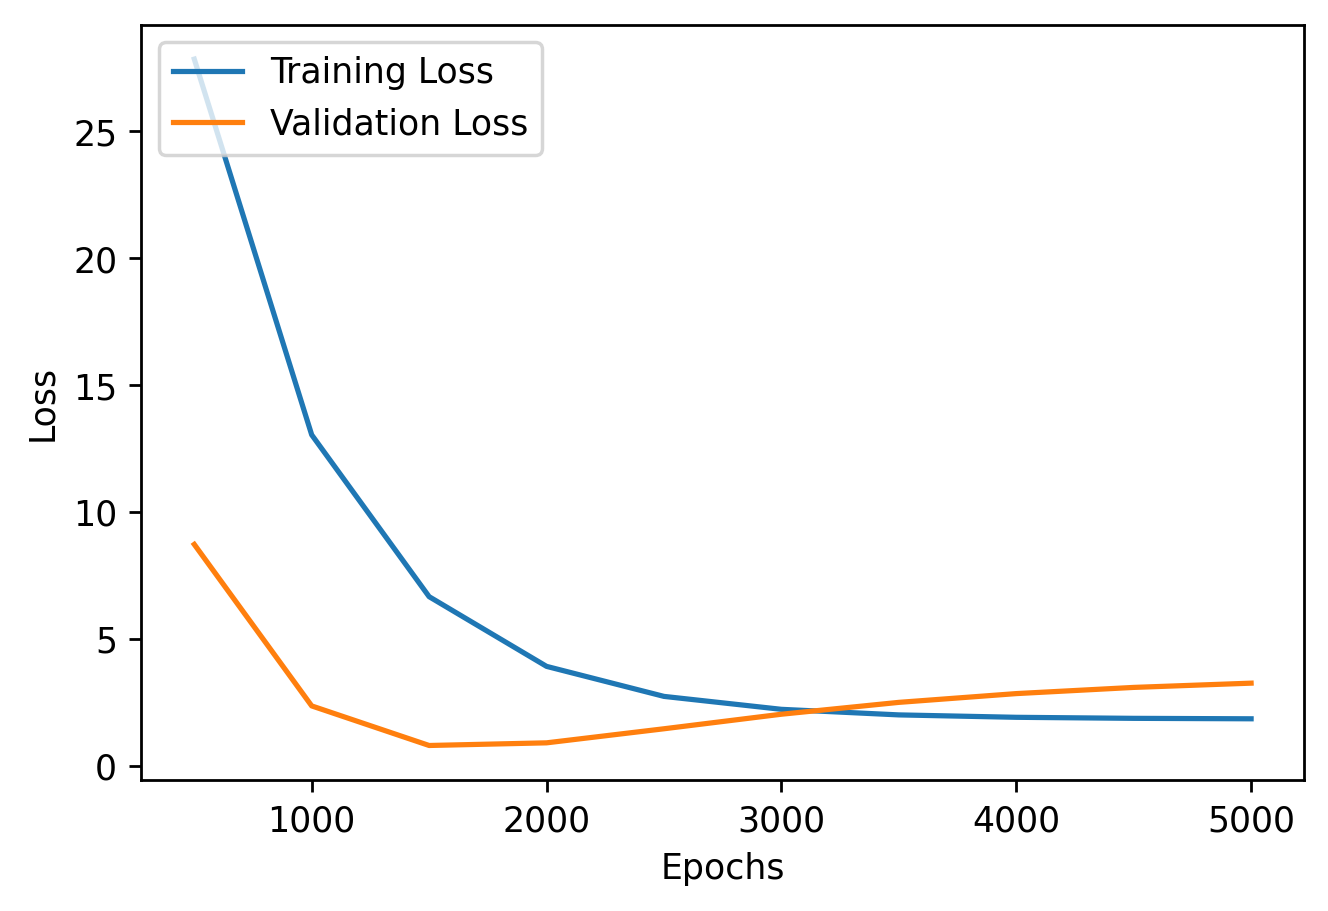

In [719]:
params = torch.tensor([1.0,1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

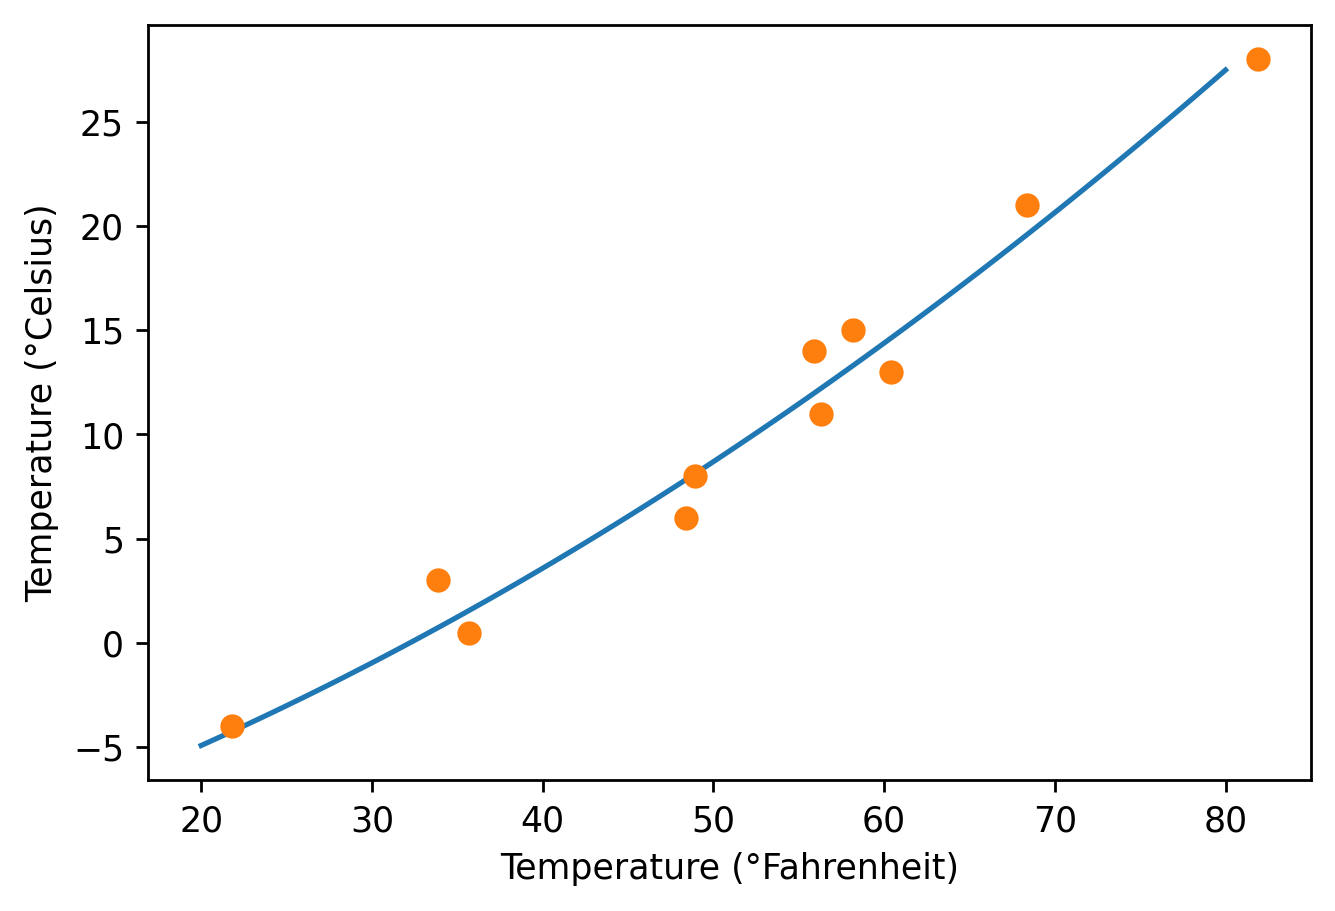

In [720]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(point, *params)  # <1>

fig = plt.figure(dpi=250)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(point.numpy()*100, t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

Epoch 500, Training loss 67.9587, Validation loss 8.4955
Epoch 1000, Training loss 46.0971, Validation loss 14.6242
Epoch 1500, Training loss 38.8577, Validation loss 15.0193
Epoch 2000, Training loss 31.6286, Validation loss 11.3778
Epoch 2500, Training loss 24.4307, Validation loss 7.6120
Epoch 3000, Training loss 17.8454, Validation loss 4.4931
Epoch 3500, Training loss 12.3072, Validation loss 2.2822
Epoch 4000, Training loss 8.0530, Validation loss 1.0587
Epoch 4500, Training loss 5.1109, Validation loss 0.7325
Epoch 5000, Training loss 3.3231, Validation loss 1.0709
[67.95870208740234, 46.09709167480469, 38.85767364501953, 31.628610610961914, 24.430747985839844, 17.84541130065918, 12.307165145874023, 8.05301570892334, 5.110893249511719, 3.3231306076049805]
[8.495452880859375, 14.624248504638672, 15.019309043884277, 11.377782821655273, 7.611987590789795, 4.493143081665039, 2.2821693420410156, 1.0586843490600586, 0.7324662208557129, 1.0708975791931152]


tensor([20.1520, 27.3717, -7.8348], requires_grad=True)

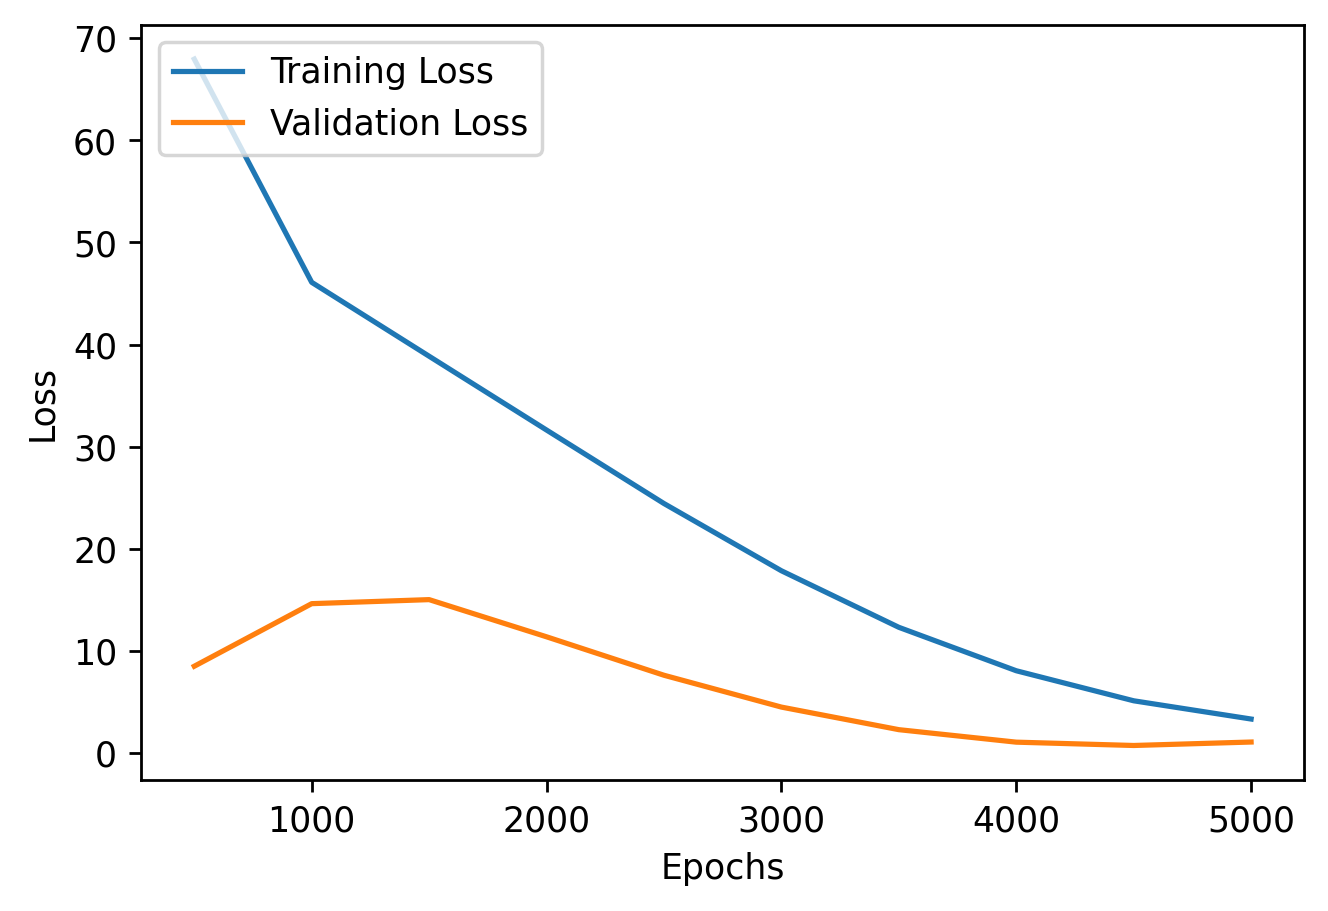

In [721]:
params = torch.tensor([1.0,1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

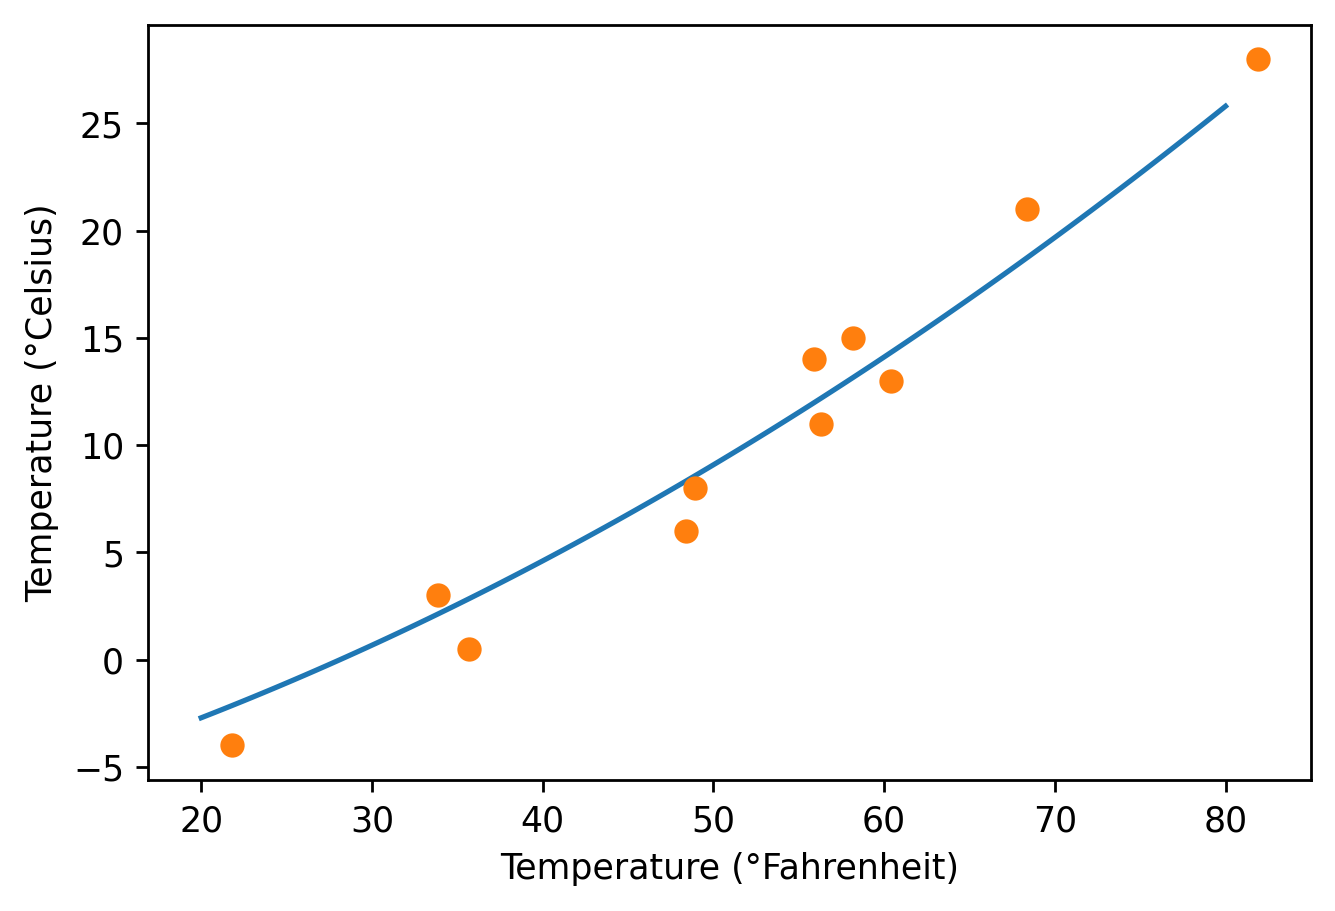

In [722]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(point, *params)  # <1>

fig = plt.figure(dpi=250)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(point.numpy()*100, t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip